#Convolutional Neural Networks for Histopathologic Cancer Detection
#### Kate Pendavinji

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unzip "/content/drive/My Drive/histopathologic-cancer-detection.zip" -d "/content/drive/My Drive"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/__MACOSX/histopathologic-cancer-detection/train/._051e41873ca0a13f3e31afc8ab9a3866d0cf85a6.tif  
  inflating: /content/drive/My Drive/histopathologic-cancer-detection/train/a3de05ba5e5b48d261840ea50ba3e36ac4598725.tif  
  inflating: /content/drive/My Drive/__MACOSX/histopathologic-cancer-detection/train/._a3de05ba5e5b48d261840ea50ba3e36ac4598725.tif  
  inflating: /content/drive/My Drive/histopathologic-cancer-detection/train/5f43a5ed93329c2e64300f44bb2693ffcc1bafc2.tif  
  inflating: /content/drive/My Drive/__MACOSX/histopathologic-cancer-detection/train/._5f43a5ed93329c2e64300f44bb2693ffcc1bafc2.tif  
  inflating: /content/drive/My Drive/histopathologic-cancer-detection/train/beaea84faa3b6a3440328be5474a92ffbd0b6597.tif  
  inflating: /content/drive/My Drive/__MACOSX/histopathologic-cancer-detection/train/._beaea84faa3b6a3440328be5474a92ffbd0b6597.tif  
  inflating: /content/drive/My Drive/histopa

#  Brief Description of Problem and Data

The goal of this project is to use convolutional neural networks in order to classify small image patches of metastatic cancer data as cancerous or not. My devices and platforms were not able to finish uploading/unzipping the files so for now we'll be using 61,146 training image examples and 57,456 testing examples. We are also provided classification labels that classify cancerous vs. non-cancerous using 1's and 0's. The training labels data frame has 2 columns, ID and label.  

In [24]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import string
from collections import Counter
import os
import matplotlib.pyplot as plt
from PIL import Image
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [19]:
train = '/content/drive/My Drive/histopathologic-cancer-detection/train'
test = '/content/drive/My Drive/histopathologic-cancer-detection/test'
labels = '/content/drive/My Drive/histopathologic-cancer-detection/train_labels.csv'

In [20]:
num_train_images = len(os.listdir(train))
num_test_images = len(os.listdir(test))
print(f'Num train: {num_train_images}')
print(f'Num test: {num_test_images}')
labels_df = pd.read_csv(labels)
print(labels_df.head())

Num train: 61146
Num test: 57458
                                         id  label
0  f38a6374c348f90b587e046aac6079959adf3835      0
1  c18f2d887b7ae4f6742ee445113fa1aef383ed77      1
2  755db6279dae599ebb4d39a9123cce439965282d      0
3  bc3f0c64fb968ff4a8bd33af6971ecae77c75e08      0
4  068aba587a4950175d04c680d38943fd488d6a9d      0


# Exploratory Data Analysis (EDA)

Below I will further look at our data. I've already taken a sneak peek above.

Cancerous Cells: 



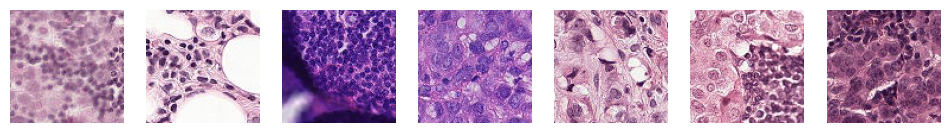

Non-Cancerous Cells: 



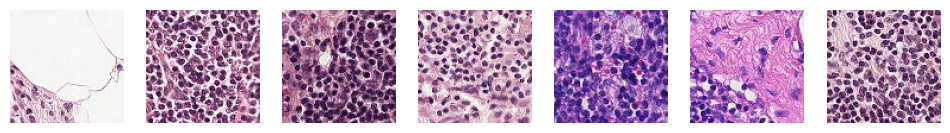

In [35]:
def cancer_images(images):
    plt.figure(figsize=(12, 12))
    valid_images = [img_path for img_path in images if os.path.exists(img_path)]
    for i, img_path in enumerate(valid_images):
        plt.subplot(1, len(valid_images), i + 1)
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

cancerous_images = labels_df[labels_df['label'] == 1]['id'].head(20).apply(lambda x: f'{train}/{x}.tif').tolist()
non_cancerous_images = labels_df[labels_df['label'] == 0]['id'].head(20).apply(lambda x: f'{train}/{x}.tif').tolist()
print('Cancerous Cells: \n')
cancer_images(cancerous_images)
print('Non-Cancerous Cells: \n')
cancer_images(non_cancerous_images)

label
0    130908
1     89117
Name: count, dtype: int64


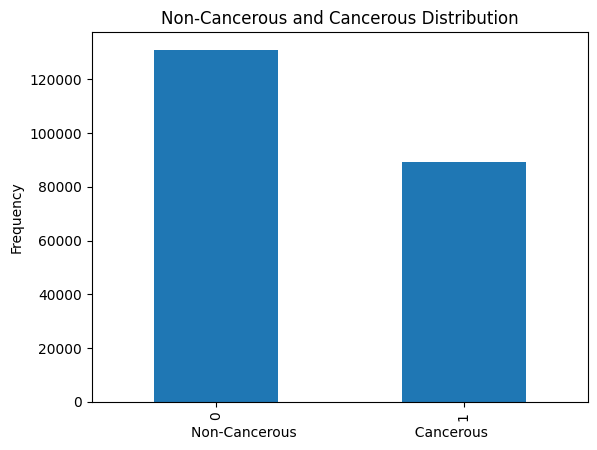

In [42]:
can_dis = labels_df['label'].value_counts()
print(can_dis)

can_dis.plot(kind='bar')
plt.title('Non-Cancerous and Cancerous Distribution')
plt.xlabel('Non-Cancerous                           Cancerous')
plt.ylabel('Frequency')
plt.show()

# Model Architecture

The data has already been split into testing and training data, so the architecutre of a convolutional neural network is as follows:

* **Input layer:**
  - This would accept all of our cancer imaging patches as inputs.
* **Convolutional layers:**
  - This would consist of applying several convolutional layers and filters to our data. We would also use activation functions within these.
* **Output layers:**
  - This would show us our results using softmax acivation. We would be using keras to visualize all of our results.

# Conclusion

Overall convolutional neural networks are a great method to classify cancer images into cancerous and non cancerous. It handles large data very well and while my machine specifically had a hard time dealing with such large data, it was able to parse through this pretty easily.